<a href="https://colab.research.google.com/github/hardiksahi/MachineLearning/blob/main/Lecture_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stat110 Lecture 8**: https://www.youtube.com/watch?v=k2BB0p8byGA&list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo&index=9.
This lecture starts with introduction to Random Variables and goes on to explain Bernoulli and Binomial distributions

**Random Variable**: It is a function that takes as input outcomes in sample space (S) of an experiment and maps it to a real line. It basically provides a handy way to summarize an aspect of an experiment (not the complete experiment)

**X: S ↦ ℜ**

e.g Consider an experiment of tossing a coin. Sample space of the experiment S: {H,T}. Let X be a Random Variable summarizing a trial of this experiment such that X(H) = 1 and X(T) = 0. This is an exampls of X being a Bernoulii Random Variable.

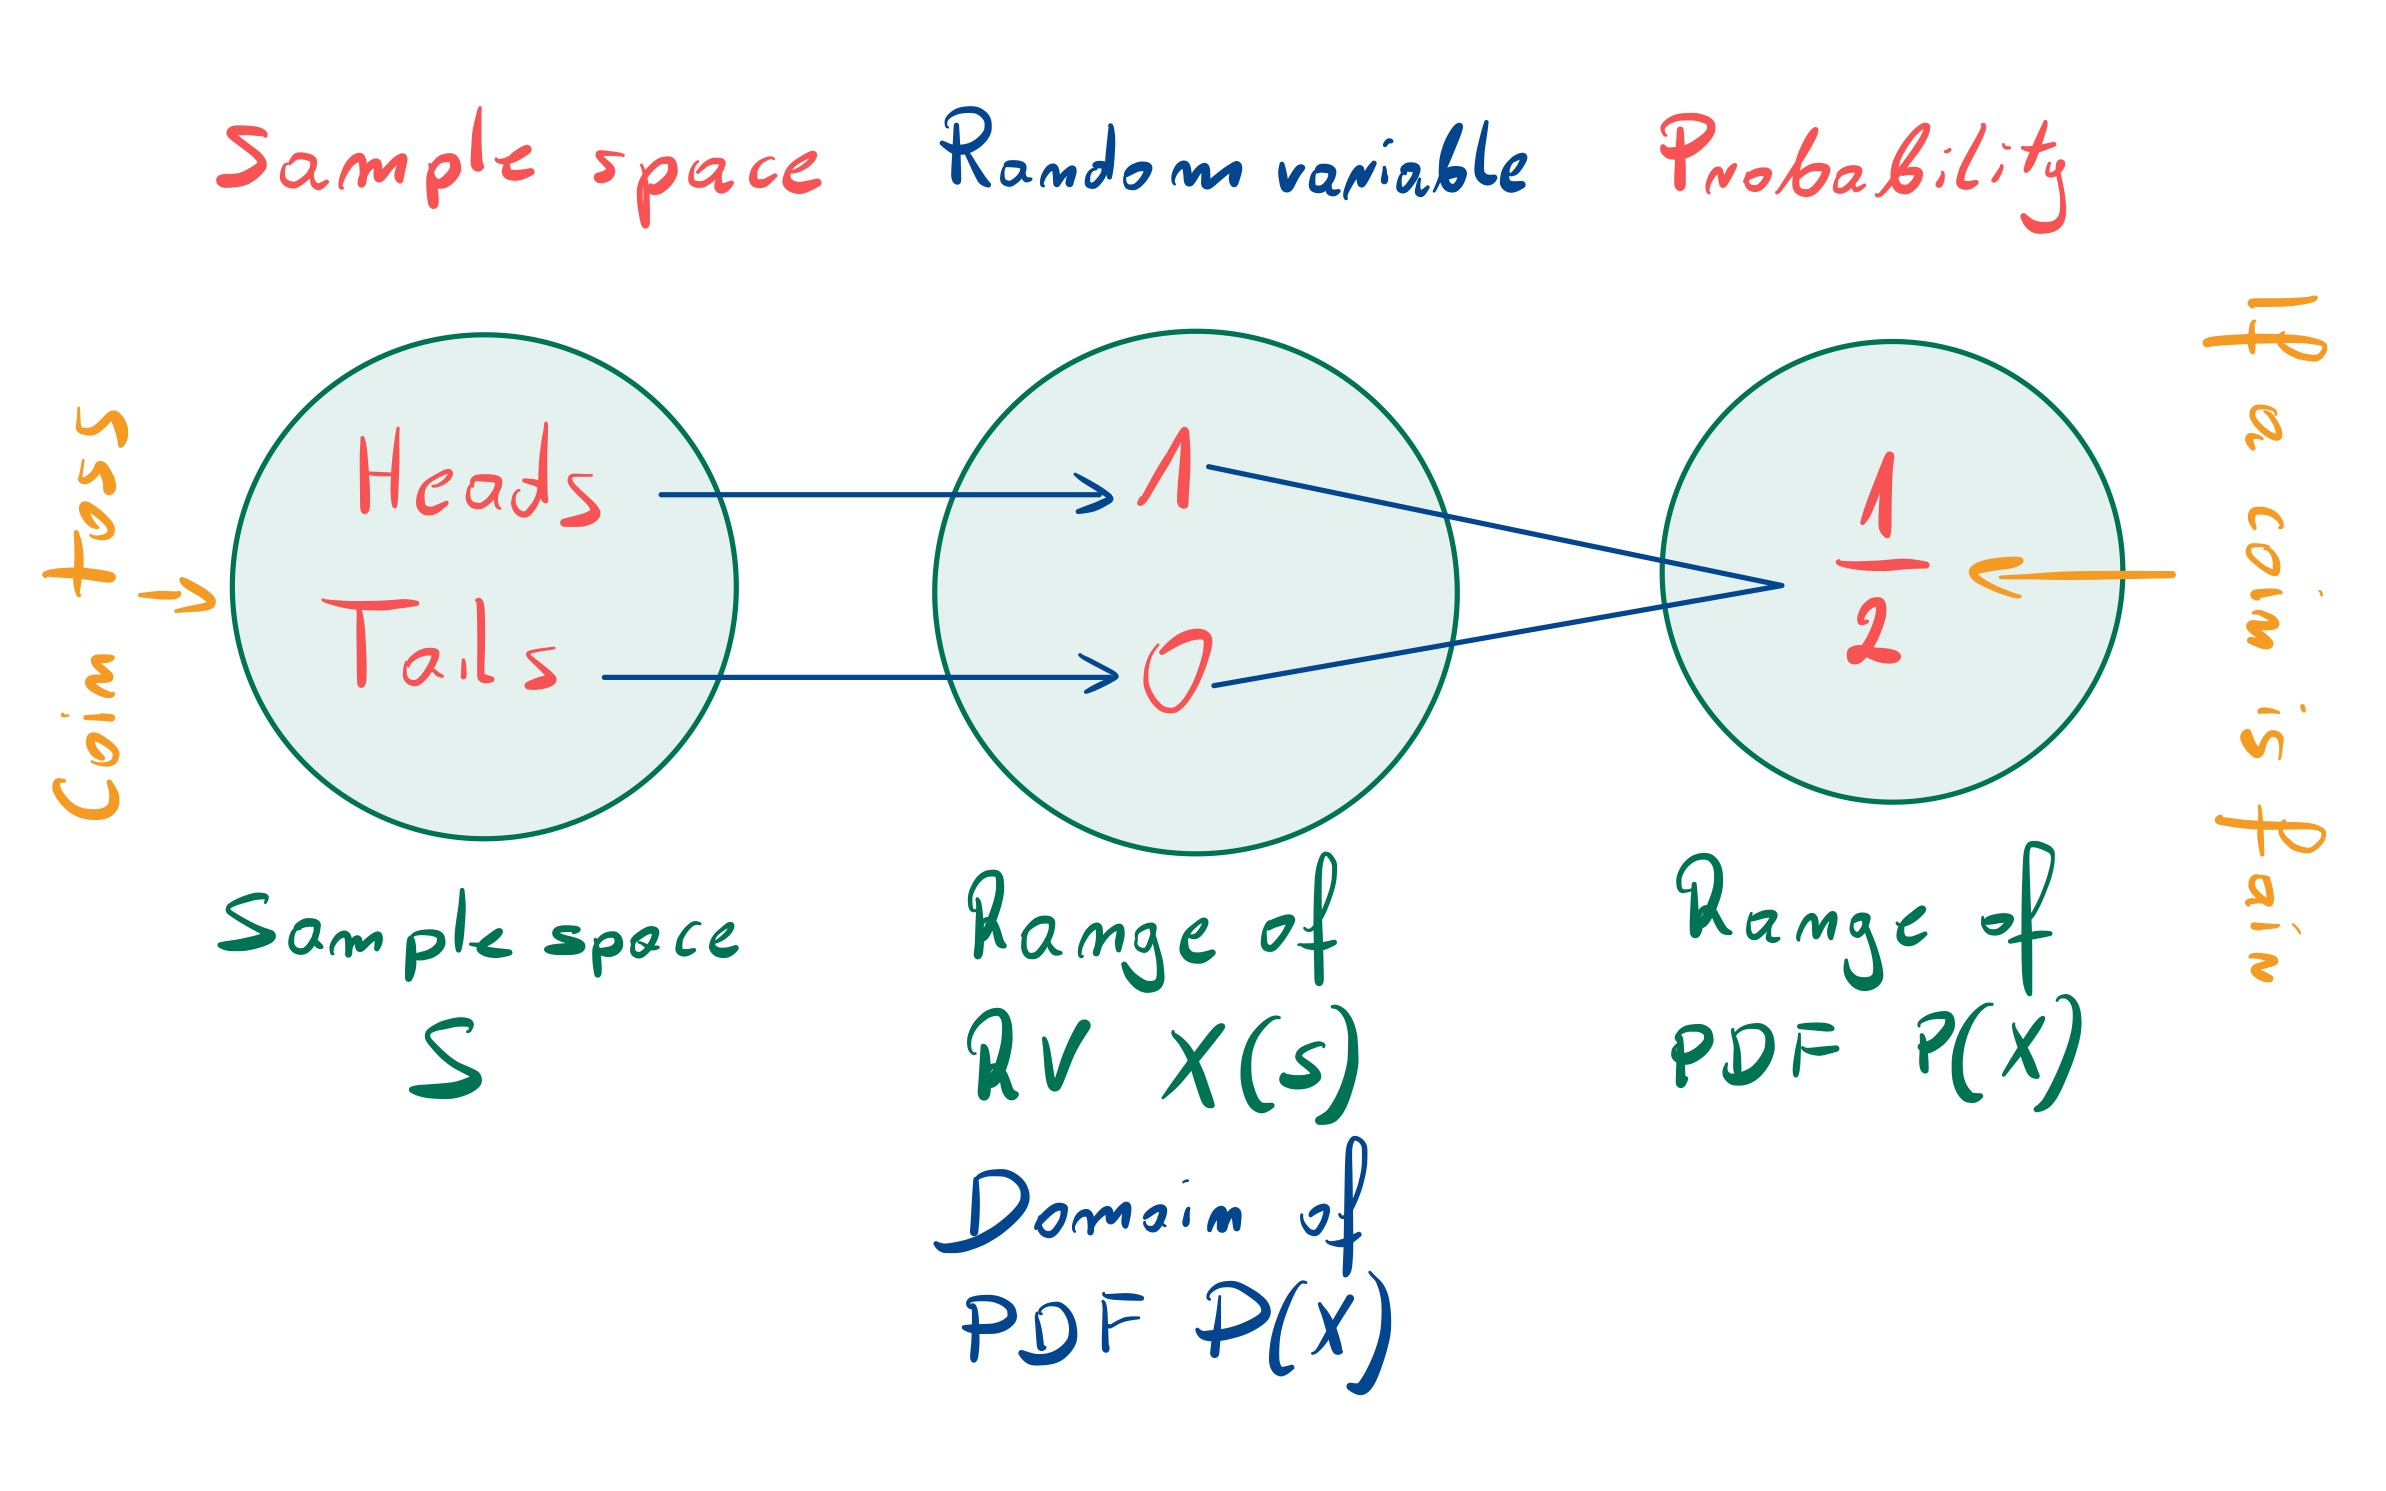


**Types of Random Variables:**


*   **Discrete RV**: These are the random variables whose range is discrete i.e integer values that can be listed (finite countable or infinite countable). For example: Bernoulli (takes values 0,1), Binomial (takes values 0 to n), Poisson etc.
*   **Continuous RV**: Thes are the random variables whose rangeis continuous i.e canot be listed. For example: Exponential distibution can take values from 0 to inf (ℜ$^{+}$)
*   **Mixed RV**



**Bernoulli Random Variable**

X ∼ Bernoulli(p) : A Random Variable X follows Bernoulli distribution if X can take only 2 values, 1 with probability p and 0 with probability 1-p. i.e.
P(X=1) = p and P(X=0) = 1-p. It is a Discrete RV since it only takes integer values that are listable.
e.g. Consider an experiment of tossing a coin. S: {H, T}. Consider RV X following Bernoulli(p) distribution. H maps to 1 and T maps to 0.


*   P(X=1) = P(outcome is Head) = p
*   P(X=0) = P(outcome is Tail) = 1-p

Any experiment whose Sample Space can be mapped to 0 and 1 with probabilities 1-p and p respectively can be summarized using Bernoulli RV.





In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from operator import itemgetter
from collections import Counter, defaultdict

In [2]:
def bernoulli_experiment(head_prob = 0.5, iteration_count = 1000):
  ## This is an experimental description of Bernoulli Random Variable using toss of a single coin
  result_list = []
  for iteration in range(iteration_count):
    result = 'H' if np.random.choice(np.arange(0,1, 0.1), size=1)<head_prob else 'T'
    result_list.append(result)
  prob_dict = {'P(Heads),P(X=1)': result_list.count('H')/iteration_count, 'P(Tails), P(X=0)': result_list.count('T')/iteration_count}
  return prob_dict

In [3]:
p_success = 0.4

In [4]:
## This describes an experiment using a bernoulli RV
coin_toss_result_prob = bernoulli_experiment(head_prob=p_success, iteration_count=1000)
coin_toss_df = pd.DataFrame.from_dict(data = coin_toss_result_prob, orient='index').reset_index().rename(columns={"index":"description", 0: "probability"})
coin_toss_df.loc[:, 'type'] = "experiment"

In [5]:
## This describes a Bernoulli RV using stats library
bernoulli_rv = stats.bernoulli(p_success)
bernoulli_prob = bernoulli_rv.pmf(k=[0,1])
bernoulli_prob_df = pd.DataFrame({"probability":bernoulli_prob, "description": ["P(Tails), P(X=0)", "P(Heads),P(X=1)"], "type":"distribution"})

In [6]:
combined_bernoulli_prob_df = pd.concat([coin_toss_df, bernoulli_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Bernoulli(0.4) distribution')]

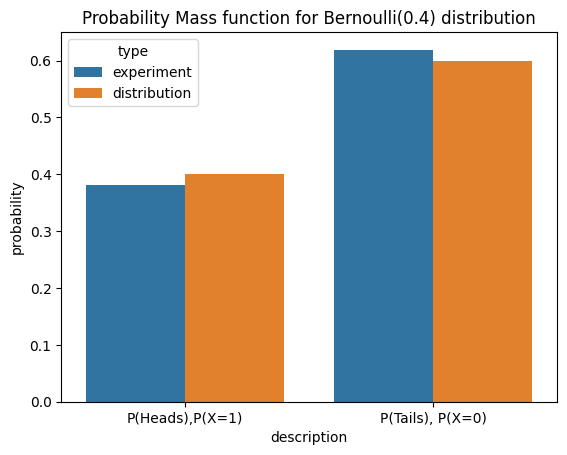

In [7]:
## Plot graph: This shows that coin toss experiment is correctly summarized using Bernoulli(p) RV
sns.barplot(data=combined_bernoulli_prob_df, x="description", y="probability", hue="type").set(title=f"Probability Mass function for Bernoulli({p_success}) distribution")

**Binomial Random Variable**

X ∼ Bin(n,p). The interpretation is as follows:


*   X represents the number of successes in n independent Bernoulli(p) trials.
*   Binomial(n,p) distribution is the distribution of number of successes in n independent Ber(p) trials.
*    P(X=k) = P(# successes=k) = $\binom{n}{k}p^k(1-p)^{n-k}$, 0<=k<=n

e.g. Consider n independent Bernoulli(p) tossing of coins i.e. n times coin is tossed one after the other such that P(head) = p. Then, the P(# heads = k) is modelled by Binomial(n,p) distribution

In [8]:
def binomial_experiment(n, p, n_iter = 1000):
  success_count_list = []
  for iter in range(n_iter):
    ## n tosses
    binomial_trail_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p else 'T' for i in range(n)]
    result_counter = Counter(binomial_trail_result_list)
    ## Count number of heads/ successed in n tosses
    success_count = result_counter.get('H', 0)
    ## Add # of heads/ successes to success_count_list
    success_count_list.append(success_count)

  success_counter = Counter(success_count_list)
  return_prob = {i: success_counter.get(i, 0)/n_iter for i in range(n+1)}
  return return_prob

In [9]:
n_binomial = 40
p_binomial = 0.8

In [10]:
binomial_experiment_result_prob = binomial_experiment(n_binomial, p_binomial, n_iter = 1000)
binomial_experiment_df = pd.DataFrame.from_dict(data = binomial_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X=k)"})
binomial_experiment_df.loc[:, 'type'] = "experiment"

In [11]:
binomial_rv = stats.binom(n_binomial, p_binomial)
binomial_prob = binomial_rv.pmf(k=[i for i in range(n_binomial+1)])
binomial_prob_df = pd.DataFrame({"P(X=k)":binomial_prob, "k": [i for i in range(n_binomial+1)], "type":"distribution"})

In [12]:
combined_binomial_prob_df = pd.concat([binomial_experiment_df, binomial_prob_df], axis=0)

[Text(0.5, 1.0, 'Probability Mass function for Binomial(40, 0.8) distribution')]

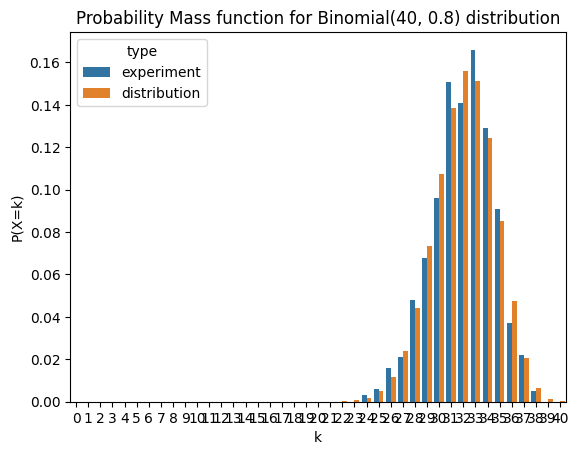

In [13]:
sns.barplot(data=combined_binomial_prob_df, x="k", y="P(X=k)", hue="type").set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")

**Add 2 DISCRETE Random Variables (Convolution operartion):**
Link: https://chrispiech.github.io/probabilityForComputerScientists/en/part4/summation_vars/

Let Z = X +Y be a Random Variable that is obtained by adding 2 Random Variables X and Y. This means we can calulate P(X+Y=n)

**Why is it called convolution?**

This is called convolution because adding random variables involves convolving their respective distirbution functions(PMF, PDF). Importantly convolution is the sum of the random variables themselves, not the addition of the probability density functions (PDF)s that correspond to the random variables. The convolution operation is as follows:

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$. -> **(1)** <br>
**X+Y=n** event can be understood as combination of disjoint events where X=i and Y=n-i so as to attain value such that X+Y=n. <br/>
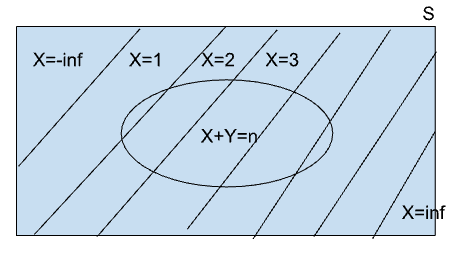


Derivation of equation **(1)** <br/>
P(X+Y=n) = P(X+Y=n, X=-inf)+...+ P(X+Y=n, X=0) + P(X+Y=n, X=1) + .... + P(X+Y=n, X=n) + .... + P(X+Y=n, X=inf) <br/>
P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, X+Y=n)$ <br/>
Using Baye's theorem: P(AB) = P(A|B)P(B) <br/>

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X+Y=n|X=i)P(X=i)$ = $\sum_{i=-∞}^{i=+∞}P(Y=n-i|X=i)P(X=i)$ = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$ <br/>

If X and Y are independent RVs then, P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i)P(Y=n-i)$ <br/>

For more details refer to:


*   https://stats.stackexchange.com/questions/95993/can-anyone-clarify-the-concept-of-a-sum-of-random-variables: Answer by Daniel Li
*   https://chrispiech.github.io/probabilityForComputerScientists/en/part4/summation_vars/



**Addition of 2 independent Binomial Random Variables**

In [21]:
## The RV in this experiment are independent by thye vvirtue of the way experiment is structured. n1 tosses are conducted and then n2 are conducted independently
def add_two_independent_binomial_variables(n1, p1, n2, p2, n_iter = 1000):
  sum_trial_count_dict = defaultdict(int) ## {total_success: trial_count}
  for i in range(n_iter):
    ## Perform n_iter trials in total
    ## Step 1: Observe Binomial X(n1, p1). Will give list of H, T of length n1
    binomial_X_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p1 else 'T' for i in range(n1)]
    ## Step 1.1 Get counts of heads and tails received in this binomial trial
    counter_X = Counter(binomial_X_result_list)
    ## Step 1.2 Get number of heads/ successes in this binomial trial
    success_X_count = counter_X.get('H',0)

    ## Step 2: Observe Binomial Y(n2, p2)
    binomial_Y_result_list = ['H' if np.random.choice(np.arange(0,1, 0.1), size=1)<p2 else 'T' for i in range(n2)]
    ## Step 2.1 Get counts of heads and tails in this trial
    counter_Y = Counter(binomial_Y_result_list)
    ## Step 2.2 Get number of heads/ successes in this trial
    success_Y_count = counter_Y.get('H', 0)

    success_x_plus_y = success_X_count + success_Y_count

    ## Update sum_trial_count_dict
    sum_trial_count_dict[success_x_plus_y] = sum_trial_count_dict[success_x_plus_y]+1

  return_prob = {k: related_trial_count/n_iter for k, related_trial_count in sum_trial_count_dict.items()}
  return return_prob

In [28]:
n_binom1 = 30
n_binom2 = 20
p_binom1 = 0.7
p_binom2 = p_binom1

In [29]:
add_binomial_experiment_result_prob = add_two_independent_binomial_variables(n_binom1, p_binom1, n_binom2, p_binom2, n_iter = 1000)
add_binomial_experiment_df = pd.DataFrame.from_dict(data = add_binomial_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X+Y=k)"})
add_binomial_experiment_df.loc[:, 'type'] = "experiment"

In [30]:
add_binomial_rv = stats.binom(n_binom1+n_binom2, p_binom1)
add_binomial_prob = add_binomial_rv.pmf(k=[i for i in range(n_binom1+n_binom2+1)])
add_binomial_prob_df = pd.DataFrame({"P(X+Y=k)":add_binomial_prob, "k": [i for i in range(n_binom1+n_binom2+1)], "type":"distribution"})

In [31]:
combined_add_binomial_prob_df = pd.concat([add_binomial_experiment_df, add_binomial_prob_df], axis=0)

<Axes: xlabel='k', ylabel='P(X+Y=k)'>

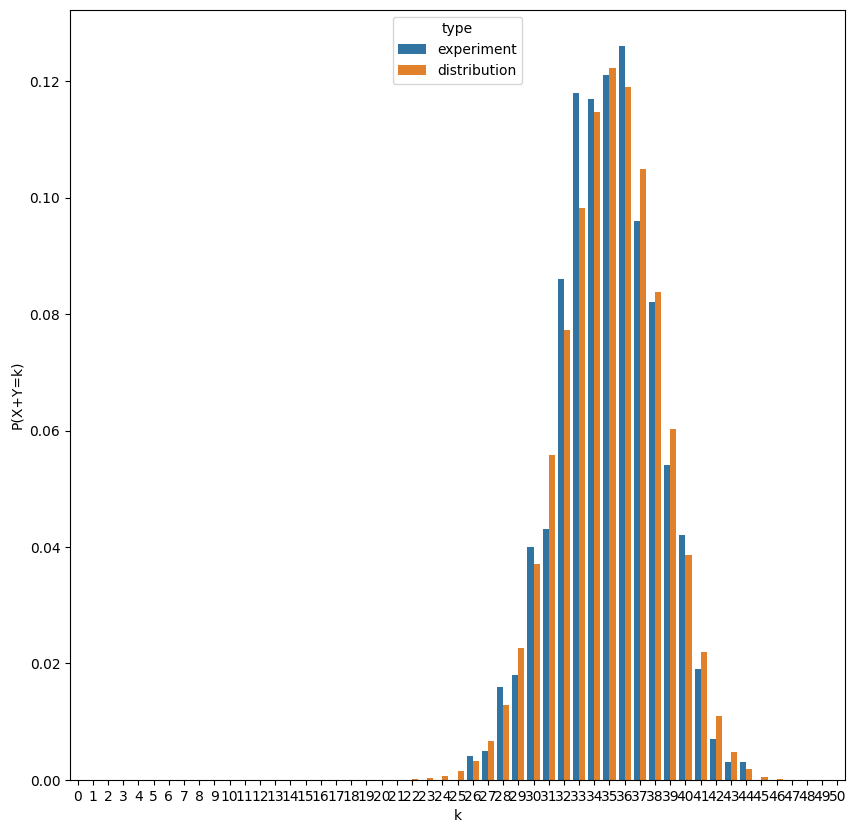

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=combined_add_binomial_prob_df, x="k", y="P(X+Y=k)", hue="type", ax=ax)#.set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")

**Addition of 2 independent Uniform Random Variables**

X ~ Uniform({a,b}) <br/>
Y ~ Uniform({a,b})

Z = X+Y is also a random variable which follows triangular distribution. <br/>

P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i, Y=n-i)$
Considering X and Y are independent variables, P(X+Y=n) = $\sum_{i=-∞}^{i=+∞}P(X=i).P(Y=n-i)$ = $\sum_{i=a}^{i=n-a}P(X=i).P(Y=n-i)$ = $\sum_{i=a}^{i=n-a}1/(b-a+1)^{2}$ = $(n-2a+1)/(b-a+1)^{2}$ <br/>

Under case when X summarizes a dice roll and Y also summarizes a dice roll with each side equally likely. P(X+Y=n) = (n-1)/36 only when 2<=n<=7

In [78]:
class discrete_uniform:
  def __init__(self, lower_input, upper_input):
    self.lower_input = lower_input
    self.upper_input = upper_input

  def pmf(self, k):
    return 1/(self.upper_input-self.lower_input+1)


In [79]:
## EXPERIMENT of throwing fair dice
def add_two_uniform_random_variables(uniform_rv_list, n_iter = 1000):
  sum_trial_count_dict = defaultdict(int)
  for i in range(n_iter):
    roll1 = np.random.choice([1,2,3,4,5,6], size=1)[0] ## each outcome eually likely = 1/6
    roll2 = np.random.choice([1,2,3,4,5,6], size=1)[0]

    sum_rolls = roll1+roll2
    sum_trial_count_dict[sum_rolls] = sum_trial_count_dict[sum_rolls]+1

  min_sum = sum([rv.lower_input for rv in uniform_rv_list])
  max_sum = sum([rv.upper_input for rv in uniform_rv_list])

  return_prob = {s:sum_trial_count_dict.get(s, 0)/n_iter for s in range(min_sum, max_sum+1, 1)}
  return return_prob

In [103]:
lower1 = 1
upper1 = 6
lower2 = 1
upper2 = 6
uniform1= discrete_uniform(lower1, upper1)
uniform2 = discrete_uniform(lower2, upper2)

In [104]:
add_uniform_experiment_result_prob = add_two_uniform_random_variables([uniform1, uniform2], n_iter = 2000)
add_uniform_experiment_df = pd.DataFrame.from_dict(data = add_uniform_experiment_result_prob, orient='index').reset_index().rename(columns={"index":"k", 0: "P(X+Y=k)"})
add_uniform_experiment_df.loc[:, 'type'] = "experiment"

In [108]:
## Create a custom discrete RV where PMF is calculated using definition of convolution defined above
class sum_independent_uniform_rv(stats.rv_discrete):
  def __init__(self, uniform1, uniform2):
    self.a1 = uniform1.lower_input
    self.b1 = uniform1.upper_input
    self.a2 = uniform2.lower_input
    self.b2 = uniform2.upper_input

  def pmf(self, k):
    return_prob_list = []
    for k_val in k:
      valid_tuple_count = 0
      for x in range(self.a1, self.b1+1):
        y = k_val-x
        ## ensure if y is meaningful value
        if y>=self.a2 and y<=self.b2:
          valid_tuple_count = valid_tuple_count+1

      prob = valid_tuple_count/((self.b1-self.a1+1)*(self.b2-self.a2+1))
      return_prob_list.append(prob)

    return return_prob_list


In [111]:
add_uniform_rv = sum_independent_uniform_rv(uniform1, uniform2)
min_sum = add_uniform_rv.a1 + add_uniform_rv.a2
max_sum = add_uniform_rv.b1 + add_uniform_rv.b2
add_uniform_prob = add_uniform_rv.pmf(k=[i for i in range(min_sum, max_sum+1, 1)])
add_uniform_prob_df = pd.DataFrame({"P(X+Y=k)":add_uniform_prob, "k": [i for i in range(min_sum, max_sum+1, 1)], "type":"distribution"})

In [113]:
combined_add_uniform_prob_df = pd.concat([add_uniform_experiment_df, add_uniform_prob_df], axis=0)

<Axes: xlabel='k', ylabel='P(X+Y=k)'>

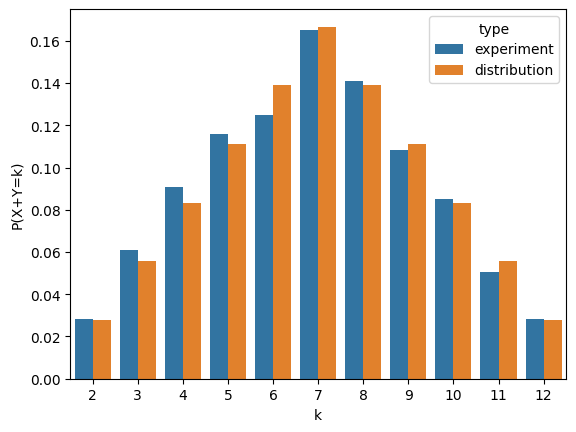

In [114]:
sns.barplot(data=combined_add_uniform_prob_df, x="k", y="P(X+Y=k)", hue="type")#.set(title=f"Probability Mass function for Binomial({n_binomial}, {p_binomial}) distribution")